<a href="https://colab.research.google.com/github/khalidtouch/electronic-component-classifier/blob/main/cv_part/Electronic_Components_TFLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Development of a Mobile Application and Computer Vision Model for Automated Identification of Electronics Components/Dataset



/content/drive/MyDrive/Development of a Mobile Application and Computer Vision Model for Automated Identification of Electronics Components/Dataset


In [4]:
%ls -la

total 24
drwx------ 2 root root 4096 Apr  4 14:18 Capacitor/
drwx------ 2 root root 4096 Apr  4 14:18 Diode/
drwx------ 2 root root 4096 Apr  4 14:18 IC/
drwx------ 2 root root 4096 Apr  4 14:18 Inductor/
drwx------ 2 root root 4096 Apr  4 14:18 Resistor/
drwx------ 2 root root 4096 Apr  4 14:18 Transformer/


In [7]:
%cd ..

/content/drive/MyDrive/Development of a Mobile Application and Computer Vision Model for Automated Identification of Electronics Components


In [9]:
base_dir = 'Dataset'
base_dir = pathlib.Path(base_dir)
VALIDATION_SPLIT = 0.3
SEED = 100
BATCH_SIZE = 32
IMAGE_SIZE = 250

In [10]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    shuffle=True,
    seed=SEED,
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    shuffle=True,
    seed=SEED,
    subset='validation')

Found 2892 images belonging to 6 classes.
Found 1236 images belonging to 6 classes.


In [11]:
for image_batch, label_batch in train_generator:
    break
image_batch.shape, label_batch.shape

((32, 250, 250, 3), (32, 6))

In [12]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
    f.write(labels)

{'Capacitor': 0, 'Diode': 1, 'IC': 2, 'Inductor': 3, 'Resistor': 4, 'Transformer': 5}


In [13]:
!cat labels.txt

Capacitor
Diode
IC
Inductor
Resistor
Transformer

In [14]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [15]:
base_model.trainable = False

In [16]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=IMG_SHAPE),
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    base_model,
    #tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [17]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 250, 250, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 250, 250, 3)      0         
 tion)                                                           
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                        

In [19]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 2


In [20]:
loss0, accuracy0 = model.evaluate(val_generator)

22/39 [===============>..............] - ETA: 2:17 - loss: 2.0180 - accuracy: 0.1719

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


39/39 [==============================] - 312s 8s/step - loss: 1.9952 - accuracy: 0.1731


In [ ]:
initial_epochs = 10

history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=initial_epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

Epoch 1/10
91/91 [==============================] - 791s 9s/step - loss: 1.1591 - accuracy: 0.5788 - val_loss: 0.8291 - val_accuracy: 0.7152
Epoch 2/10
91/91 [==============================] - 272s 3s/step - loss: 0.8408 - accuracy: 0.7009 - val_loss: 0.7408 - val_accuracy: 0.7484
Epoch 3/10
91/91 [==============================] - 269s 3s/step - loss: 0.7437 - accuracy: 0.7365 - val_loss: 0.7079 - val_accuracy: 0.7540
Epoch 4/10
91/91 [==============================] - 272s 3s/step - loss: 0.6914 - accuracy: 0.7500 - val_loss: 0.6702 - val_accuracy: 0.7678
Epoch 5/10
91/91 [==============================] - 269s 3s/step - loss: 0.6594 - accuracy: 0.7669 - val_loss: 0.6631 - val_accuracy: 0.7727
Epoch 6/10
91/91 [==============================] - 271s 3s/step - loss: 0.6174 - accuracy: 0.7784 - val_loss: 0.6605 - val_accuracy: 0.7727
Epoch 7/10
91/91 [==============================] - 266s 3s/step - loss: 0.5986 - accuracy: 0.7891 - val_loss: 0.6353 - val_accuracy: 0.7872
Epoch 8/10
91

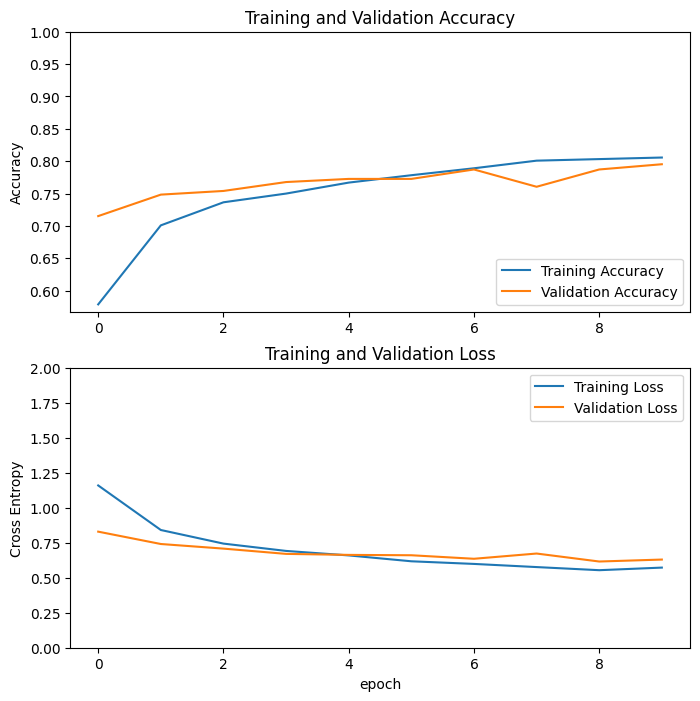

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [23]:
base_model.trainable = True

In [24]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

Number of layers in the base model:  154


In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 250, 250, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 250, 250, 3)      0         
 tion)                                                           
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                        

In [27]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 56


In [28]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs
history_fine = model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=total_epochs, 
                         initial_epoch=history.epoch[-1],
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

Epoch 10/20
91/91 [==============================] - 413s 4s/step - loss: 1.0567 - accuracy: 0.6535 - val_loss: 4.4101 - val_accuracy: 0.6019
Epoch 11/20
75/91 [=======================>......] - ETA: 56s - loss: 0.7442 - accuracy: 0.7492 

KeyboardInterrupt: ignored

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('mobilenet_v2_fine_tuned2.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: save/fine_tuning/assets


In [ ]:
from google.colab import files

files.download('mobilenet_v2_fine_tuned2.tflite')
files.download('labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

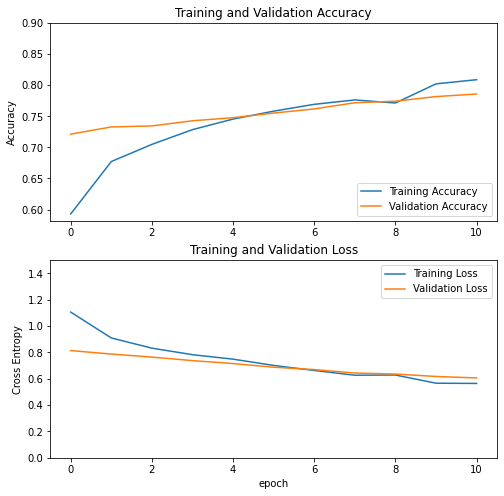

In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.9])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()